In [1]:
!pip3 install matplotlib

In [2]:
# Imports
from tira.third_party_integrations import ensure_pyterrier_is_loaded, persist_and_normalize_run
from tira.rest_api_client import Client
import pyterrier as pt
import matplotlib.pyplot as plt

In [3]:
# Create a REST client to the TIRA platform for retrieving the pre-indexed data.
ensure_pyterrier_is_loaded()
tira = Client()

PyTerrier 0.10.0 has loaded Terrier 5.8 (built by craigm on 2023-11-01 18:05) and terrier-helper 0.0.8

No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.


In [4]:
# The dataset: the union of the IR Anthology and the ACL Anthology
# This line creates an IRDSDataset object and registers it under the name provided as an argument.
pt_dataset = pt.get_dataset('irds:ir-lab-sose-2024/ir-acl-anthology-20240504-training')


In [5]:
# Some baselines that were executed in TIRA

bm25_baseline = tira.pt.from_submission('ir-benchmarks/tira-ir-starter/BM25 (tira-ir-starter-pyterrier)', pt_dataset)
sparse_cross_encoder = tira.pt.from_submission('ir-benchmarks/fschlatt/sparse-cross-encoder-4-512', pt_dataset)
rank_zephyr = tira.pt.from_submission('workshop-on-open-web-search/fschlatt/rank-zephyr', pt_dataset)

There are multiple query fields available: ('text', 'title', 'query', 'description', 'narrative'). To use with pyterrier, provide variant or modify dataframe to add query column.


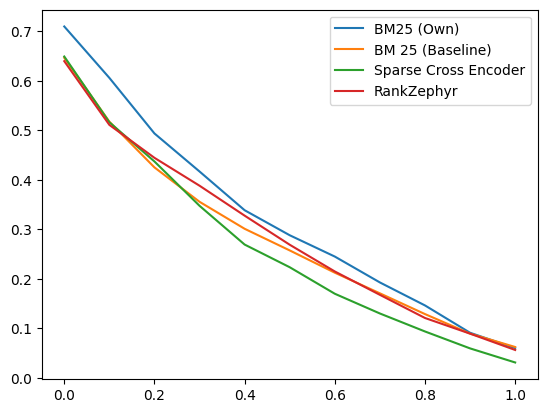

In [6]:
# This assumes we have execited the ../baseline-retrieval-system/baseline-retrieval-system.ipynb notebook before.
bm25 = pt.io.read_results('../runs/run.txt')

df = pt.Experiment(
    [bm25, bm25_baseline, sparse_cross_encoder, rank_zephyr],
    pt_dataset.get_topics(),
    pt_dataset.get_qrels(),
    ["iprec_at_recall"],
    names=["BM25 (Own)", "BM 25 (Baseline)", "Sparse Cross Encoder", "RankZephyr"]
)

for list in df.to_numpy().tolist() :
    plt.plot([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], list[1:], label=list[0])

plt.legend()
plt.show()